In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Read the cleaned CSV file into a DataFrame
df = pd.read_csv("cleaned_stock_data_no_nan.csv")

In [2]:
# Print a sample of the data
print(df.head())  # Prints the first few rows of the DataFrame

         Date       Open       High        Low      Close  Adj Close  \
0  2018-10-16  54.732498  55.747501  54.189999  55.537498  53.261963   
1  2018-10-17  55.575001  55.660000  54.834999  55.297501  53.031792   
2  2018-10-18  54.465000  54.935001  53.250000  54.005001  51.792252   
3  2018-10-19  54.514999  55.314999  54.357498  54.827499  52.581051   
4  2018-10-22  54.947498  55.840000  54.735001  55.162498  52.902325   

      Volume  Year  Month  Day  Daily_Return     MA_50     MA_200  
0  116736000  2018     10   16      0.022037  54.92185  47.399888  
1   91541600  2018     10   17     -0.004321  54.99225  47.461050  
2  130325200  2018     10   18     -0.023374  55.03610  47.515788  
3  132314800  2018     10   19      0.015230  55.08825  47.573638  
4  115168400  2018     10   22      0.006110  55.15385  47.630700  


Descriptions on each column: 

`Date`: The date of the recorded stock data.

`Open`: The opening price of the stock on that particular date. The opening price of a stock provides information about the initial sentiment of market participants and can be an indicator of market expectations or reaction to news events.

`High`: The highest price of the stock during the trading day.

`Low`: The lowest price of the stock during the trading day. The highest and lowest prices reached during a trading day provide insights into the stock's volatility and the range within which the stock price fluctuated.

`Close`: The closing price of the stock on that particular date. The closing price is a crucial factor as it represents the final price at which a stock trades on a given day. It reflects the sentiment of market participants and incorporates the overall market activity during the trading day.

`Adj Close`: The adjusted closing price of the stock, taking into account factors such as dividends and stock splits. The adjusted closing price takes into account factors such as dividends and stock splits. It provides a more accurate representation of the stock's actual value over time, allowing for consistent comparison across different periods.

`Volume`: The trading volume of the stock on that particular date. Trading volume refers to the number of shares or contracts traded during a specific period. It reflects the level of investor interest and liquidity in the stock. Unusually high or low volume levels can indicate significant market activity or lack thereof, which may have implications for future price movements.

`Daily_Return`: This column may represent the daily returns of the stock, calculated as the percentage change in the stock's closing price from the previous day.

`MA_50`: This column may represent the 50-day moving average of the stock's closing price. The moving average is a commonly used technical indicator that helps smooth out short-term fluctuations in the price and provides a trend-following signal.

`MA_200`: This column may represent the 200-day moving average of the stock's closing price. Similar to the "MA_50" column, this moving average helps identify longer-term trends in the stock's price.

What to predict? 

When predicting the stock price, the specific column you choose to predict depends on your specific objective and the type of analysis you want to perform. Here are some considerations for each column:

- **Open Price**: Predicting the opening price of a stock can be useful if you want to capture the initial sentiment or market expectations at the beginning of a trading day. This can be relevant for certain trading strategies or analyzing market reactions to news events.

- **High and Low Prices**: Predicting the highest and lowest prices during a trading day can provide insights into the stock's volatility and the range within which the stock price fluctuates. This information can be valuable for day trading or risk management purposes.

- **Close Price**: Predicting the closing price is a common approach as it represents the final price at which a stock trades on a given day. It reflects the sentiment of market participants and incorporates the overall market activity during the trading day. Predicting the closing price can be useful for long-term investment strategies or analyzing daily price trends.

- **Adjusted Close Price**: Predicting the adjusted closing price, which takes into account factors such as dividends and stock splits, can provide a more accurate representation of the stock's actual value over time. This adjusted price can be useful for historical analysis, comparing performance across different periods, or dividend-focused investment strategies.

- **Daily Return**: Predicting the daily returns of the stock, which could also be useful when we examine alongside the close price. 

When selecting a column to predict, consider your specific objectives, the type of analysis you want to perform, and the time frame you are interested in. It's also important to note that predicting stock prices accurately is a challenging task, and multiple factors influence price movements. Therefore, it's recommended to conduct thorough research, utilize appropriate modeling techniques, and incorporate additional features or indicators to improve the accuracy of your predictions.

In [5]:
# Descriptive statistics
statistics = df.describe()
print("Descriptive Statistics:")
print(statistics)

Descriptive Statistics:
              Open         High          Low        Close    Adj Close  \
count  5241.000000  5241.000000  5241.000000  5241.000000  5241.000000   
mean    129.826983   131.314671   128.311583   129.868259   128.445130   
std      65.569295    66.231334    64.868912    65.586052    64.766784   
min      35.994999    36.430000    35.500000    35.547501    34.209965   
25%      83.449997    84.711998    82.274498    83.419998    82.811607   
50%     115.080002   116.720001   113.720001   115.080002   114.261620   
75%     158.979996   160.710007   156.720001   158.820007   158.073502   
max     344.619995   349.670013   342.200012   343.109985   338.335907   

             Volume         Year        Month          Day  Daily_Return  \
count  5.241000e+03  5241.000000  5241.000000  5241.000000   5241.000000   
mean   6.365838e+07  2020.307193     6.319023    15.711696      0.000639   
std    4.789734e+07     1.537906     3.466486     8.750697      0.025950   
min  

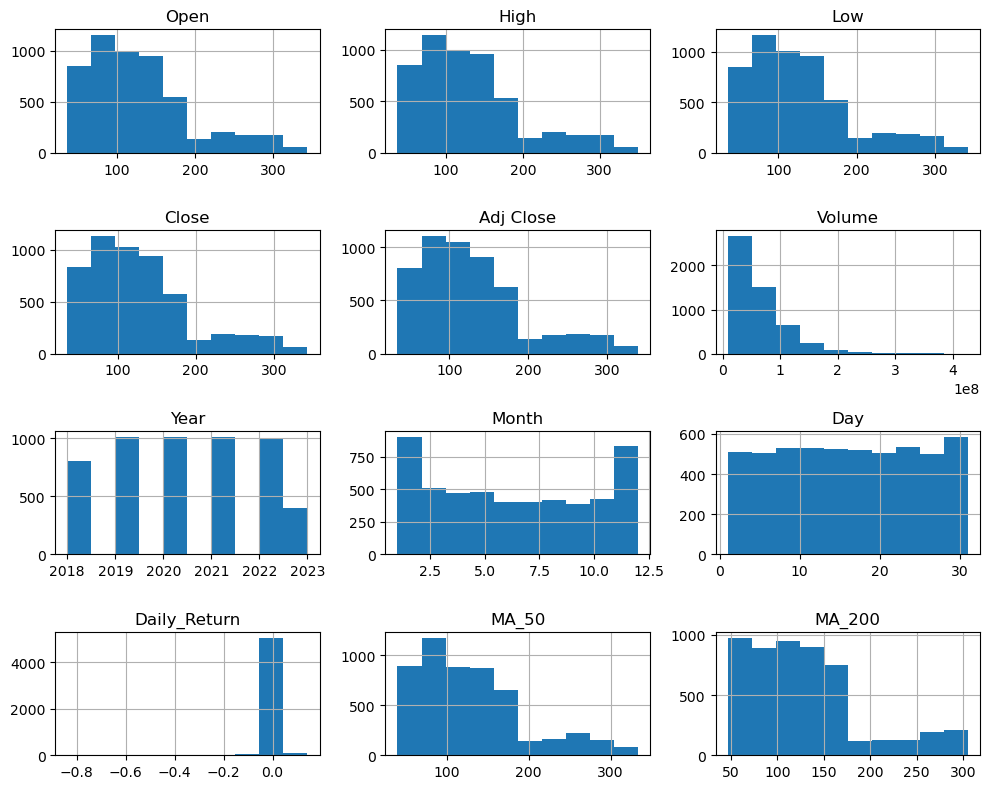

In [9]:
# Distribution of variables
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

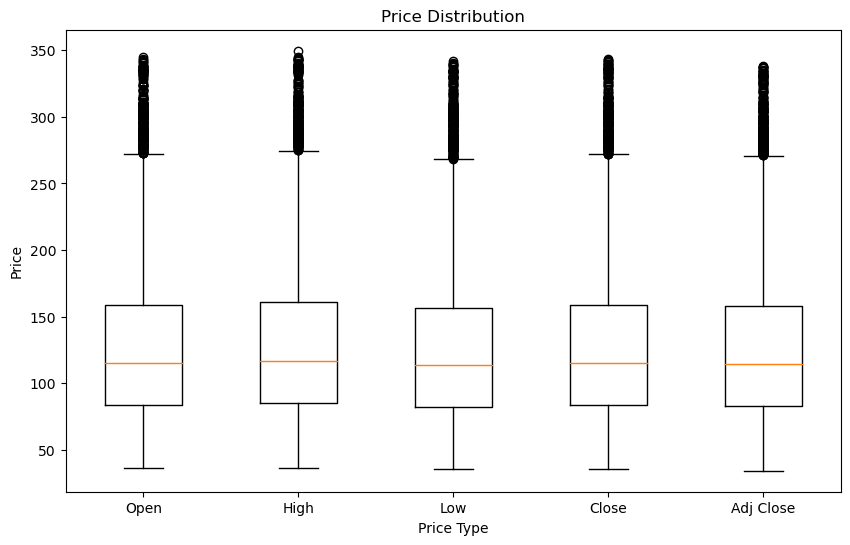

In [15]:
# Select the columns of interest
price = data[['Open', 'High', 'Low', 'Close', 'Adj Close']]

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(price.values, labels=price.columns)
plt.title('Price Distribution')
plt.xlabel('Price Type')
plt.ylabel('Price')
plt.show()

They are almost in the same amount of level. 

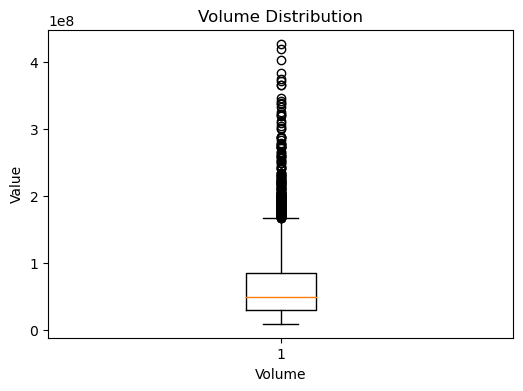

In [16]:
# Select the 'Volume' column
volume = data['Volume']

# Create the boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(volume)
plt.title('Volume Distribution')
plt.xlabel('Volume')
plt.ylabel('Value')
plt.show()

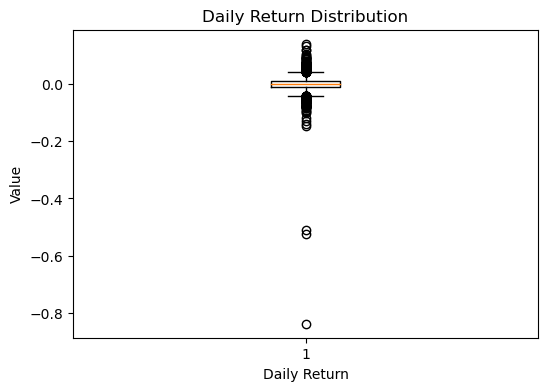

In [17]:
# Select the 'Daily_Return' column
daily_return = data['Daily_Return']

# Create the boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(daily_return)
plt.title('Daily Return Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Value')
plt.show()

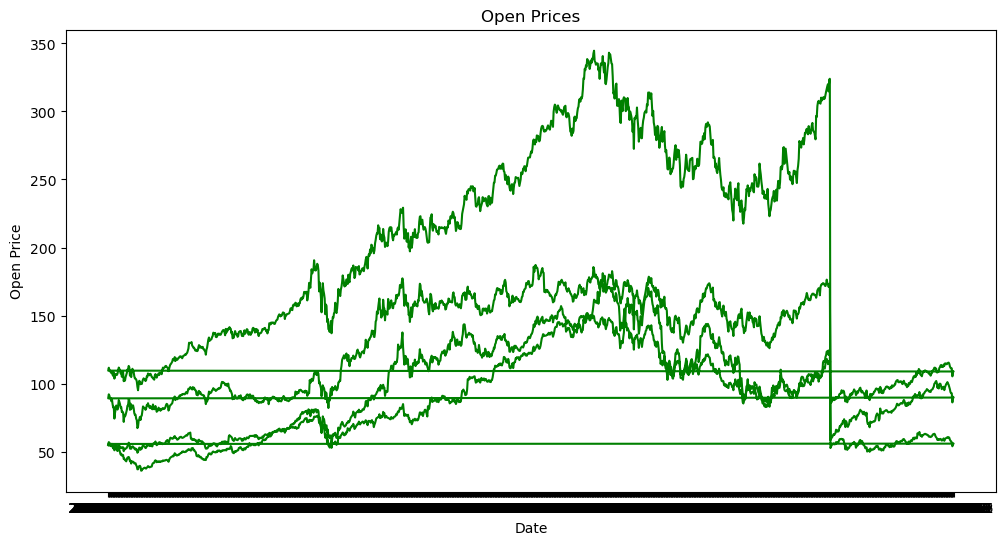

In [14]:
# Open

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot 'Open' column
plt.plot(data['Date'], data['Open'], color='green')

# Customize the plot
plt.title('Open Prices')
plt.xlabel('Date')
plt.ylabel('Open Price')

# Display the plot
plt.show()

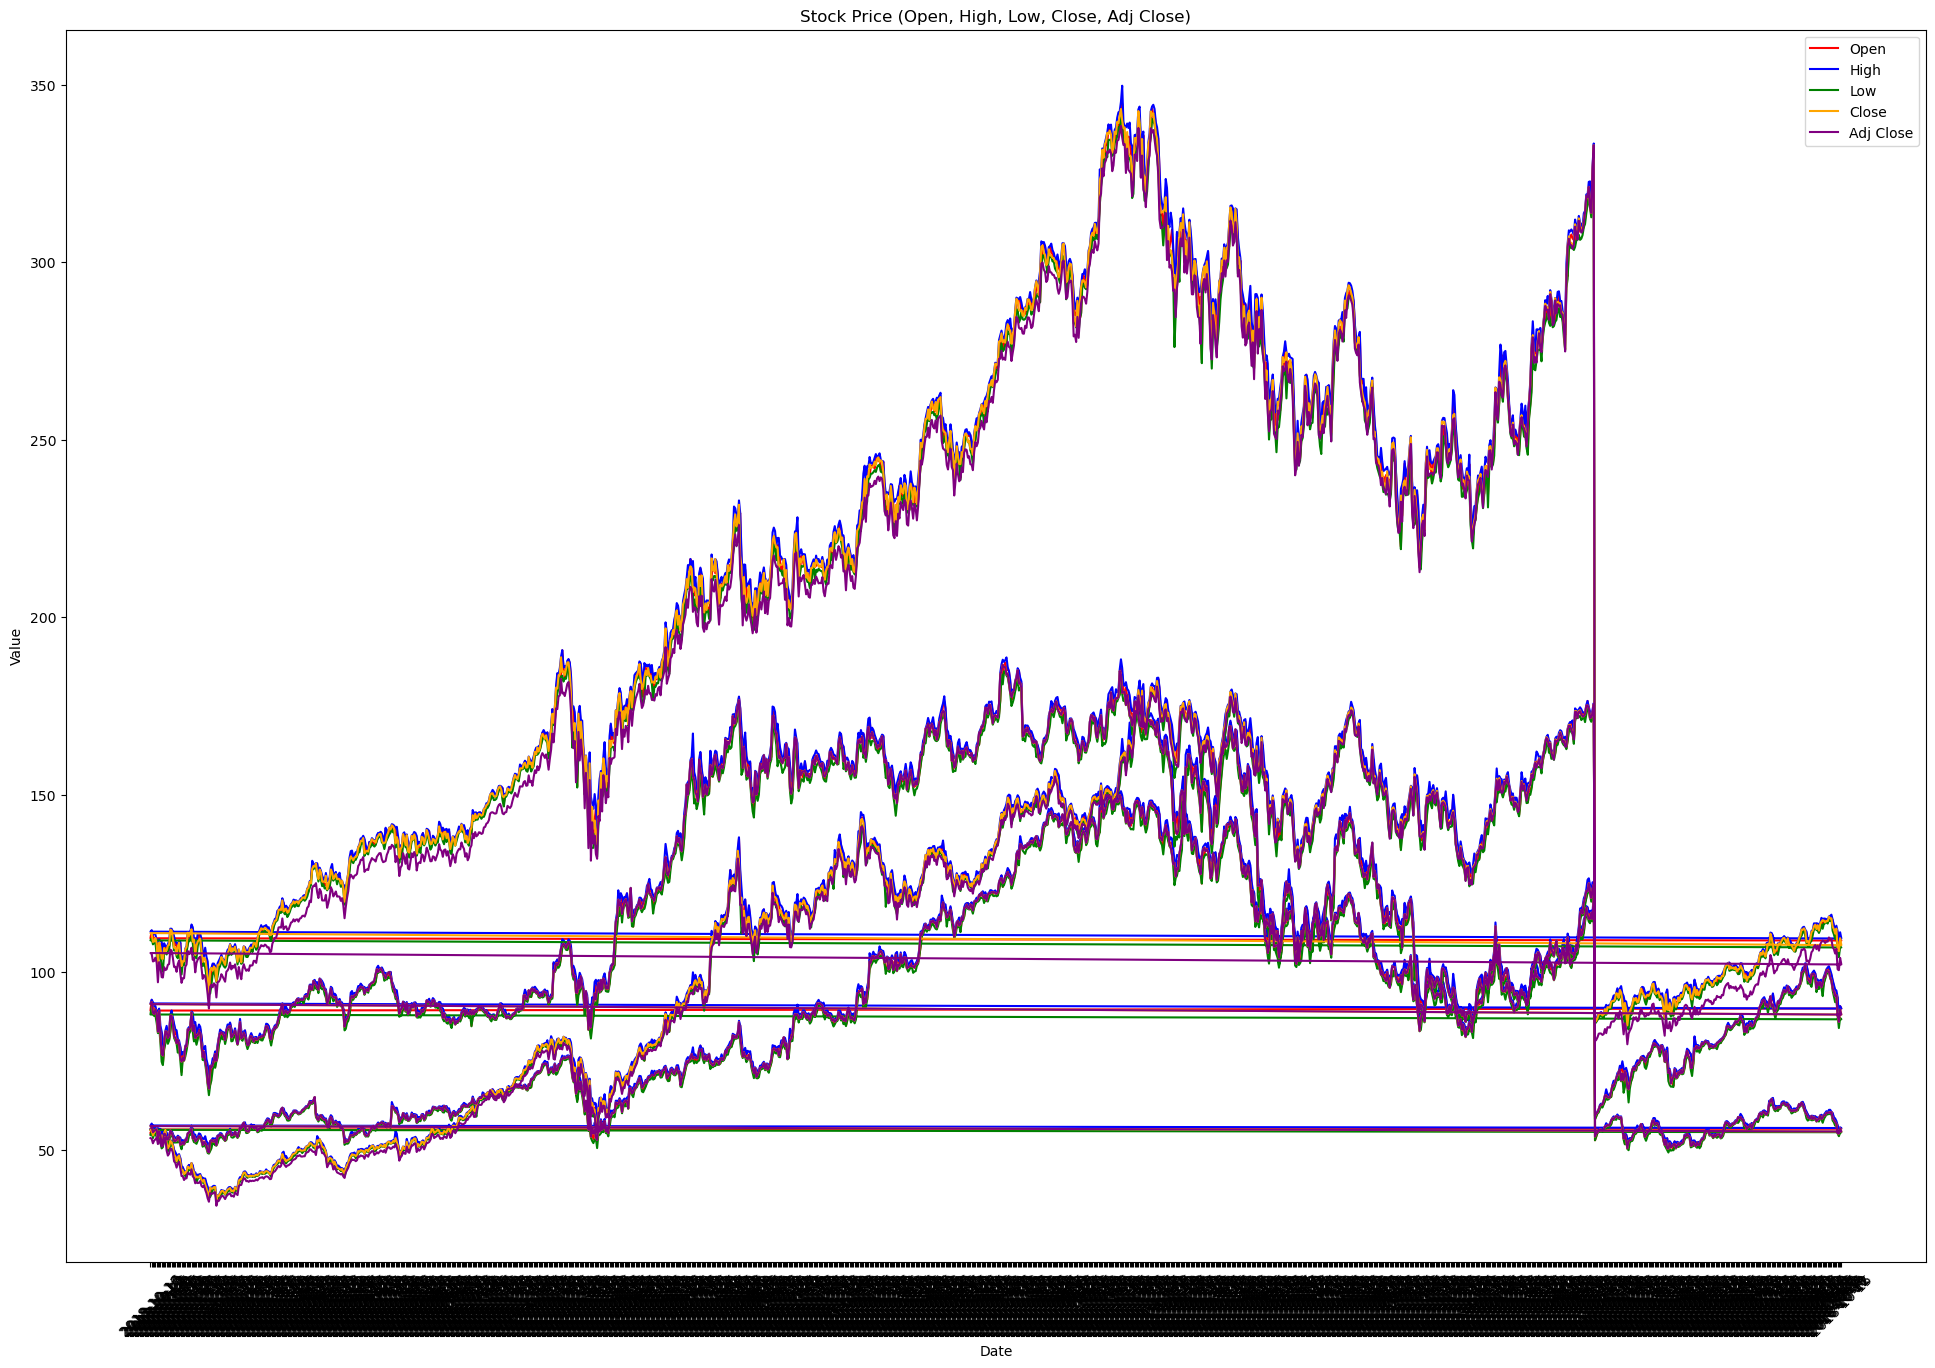

In [13]:
# Read the data from the CSV file
data = pd.read_csv('cleaned_stock_data_no_nan.csv')

# Set up the plot
plt.figure(figsize=(24, 16))

# Define the colors for each column
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Plot 'Open', 'High', 'Low', and 'Close' columns together
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close']
for i, column in enumerate(columns):
    plt.plot(data['Date'], data[column], color=colors[i], label=column)

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Stock Price (Open, High, Low, Close, Adj Close)')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.show()

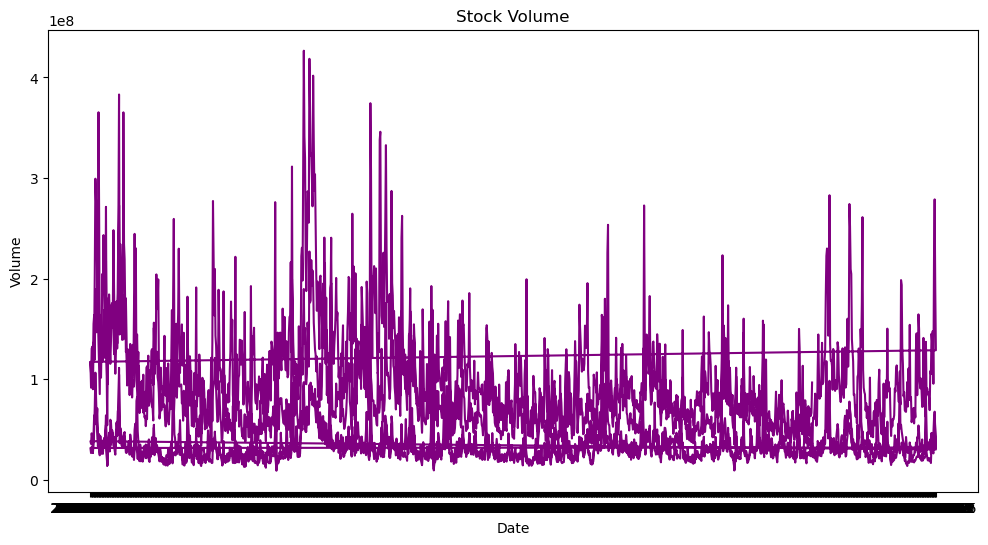

In [11]:
# Volume

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot 'Volume' column
plt.plot(data['Date'], data['Volume'], color='purple')

# Customize the plot
plt.title('Stock Volume')
plt.xlabel('Date')
plt.ylabel('Volume')

# Display the plot
plt.show()

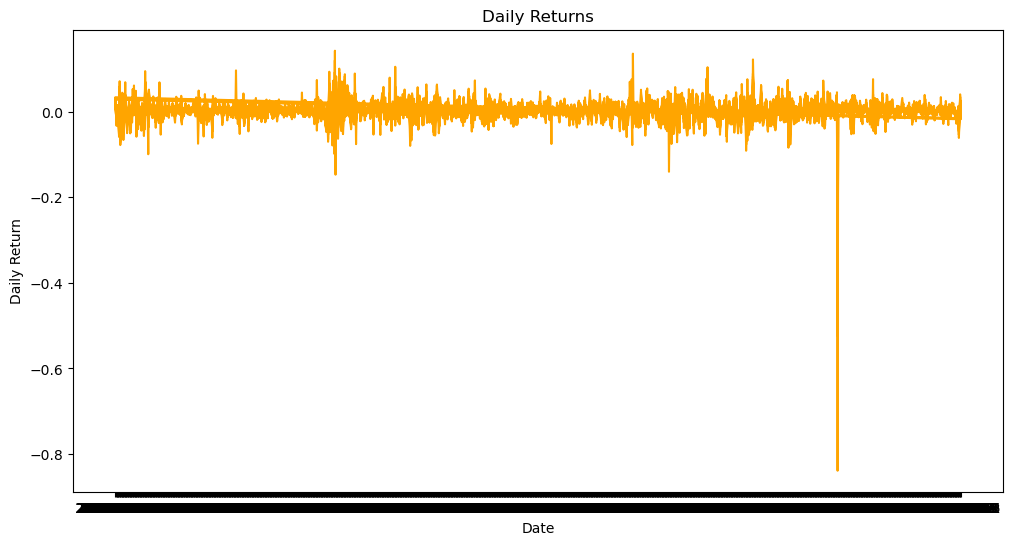

In [12]:
# Daily_Return 

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot 'Daily_Return' column
plt.plot(data['Date'], data['Daily_Return'], color='orange')

# Customize the plot
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')

# Display the plot
plt.show()

We are interested in exploring time-series forecasting techniques or advanced neural network methods to analyze the aforementioned time-dependent features.

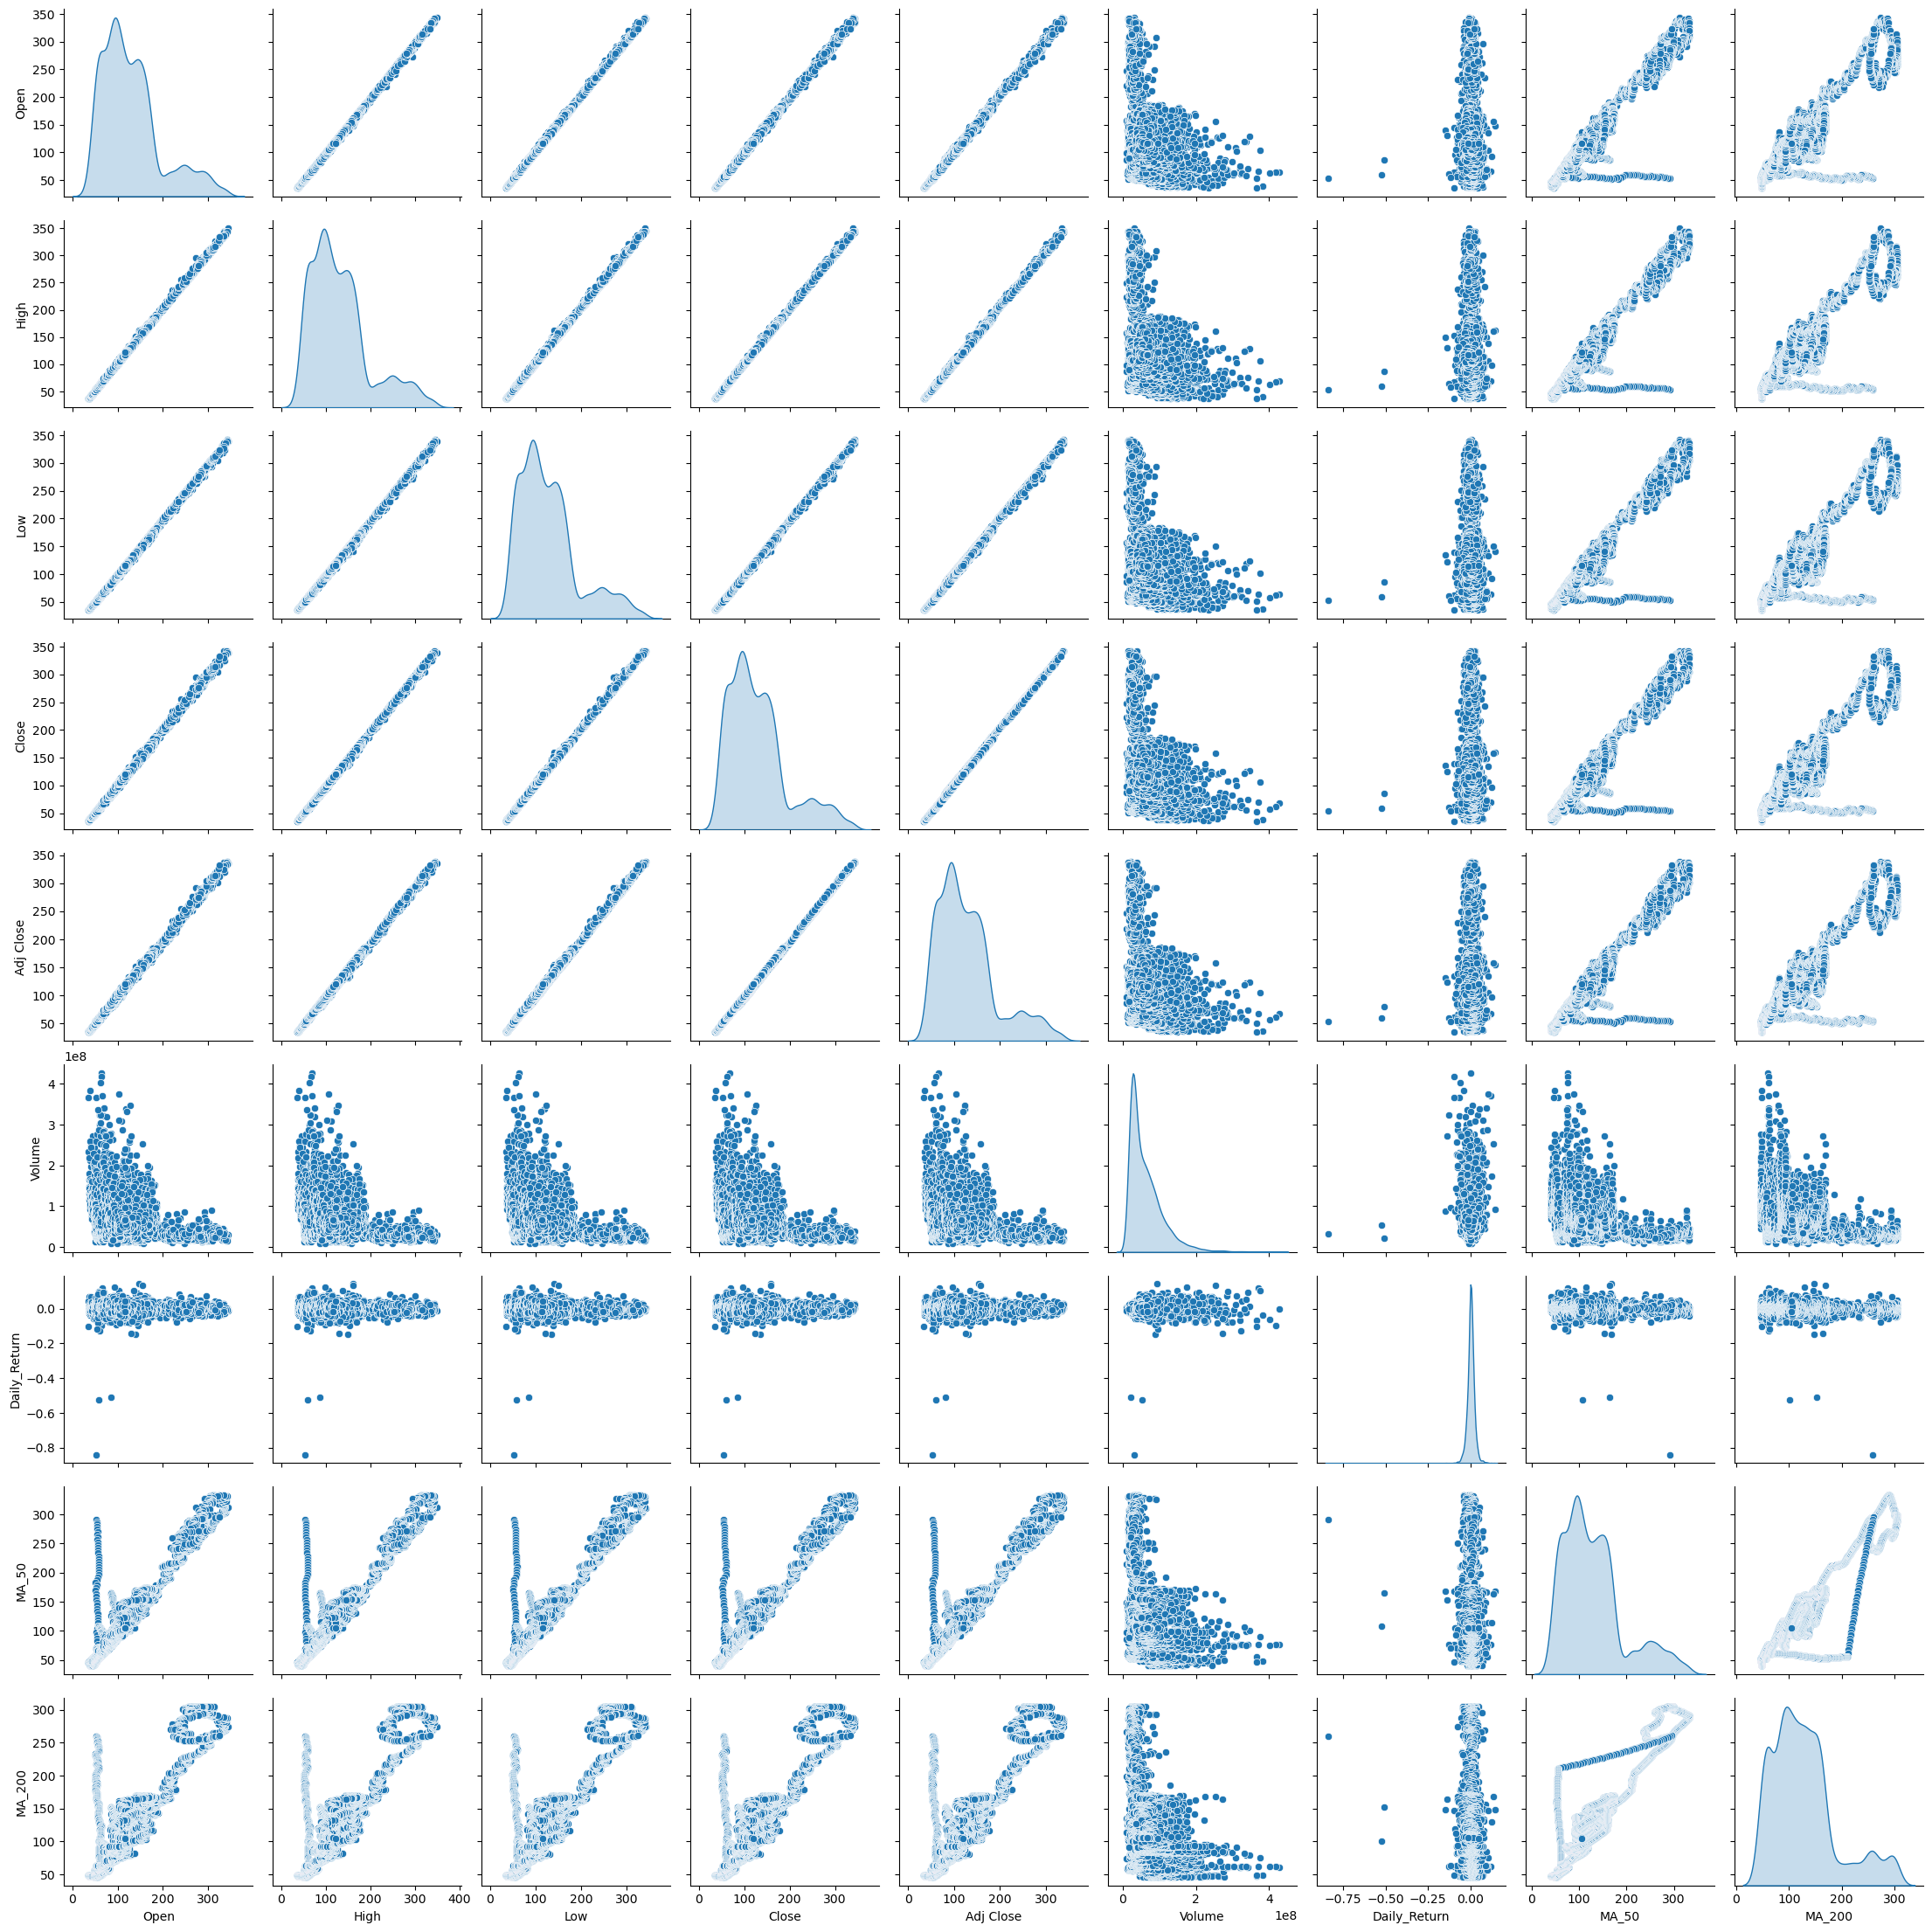

In [20]:
# Select the columns 'Open', 'High', 'Low', 'Close', 'Adj Close'
price = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily_Return', 'MA_50', 'MA_200']]

# Create the pairplot
sns.pairplot(price, diag_kind='kde')
plt.show()

It appears that there is a potential for performing linear regression analysis on the price-related features.

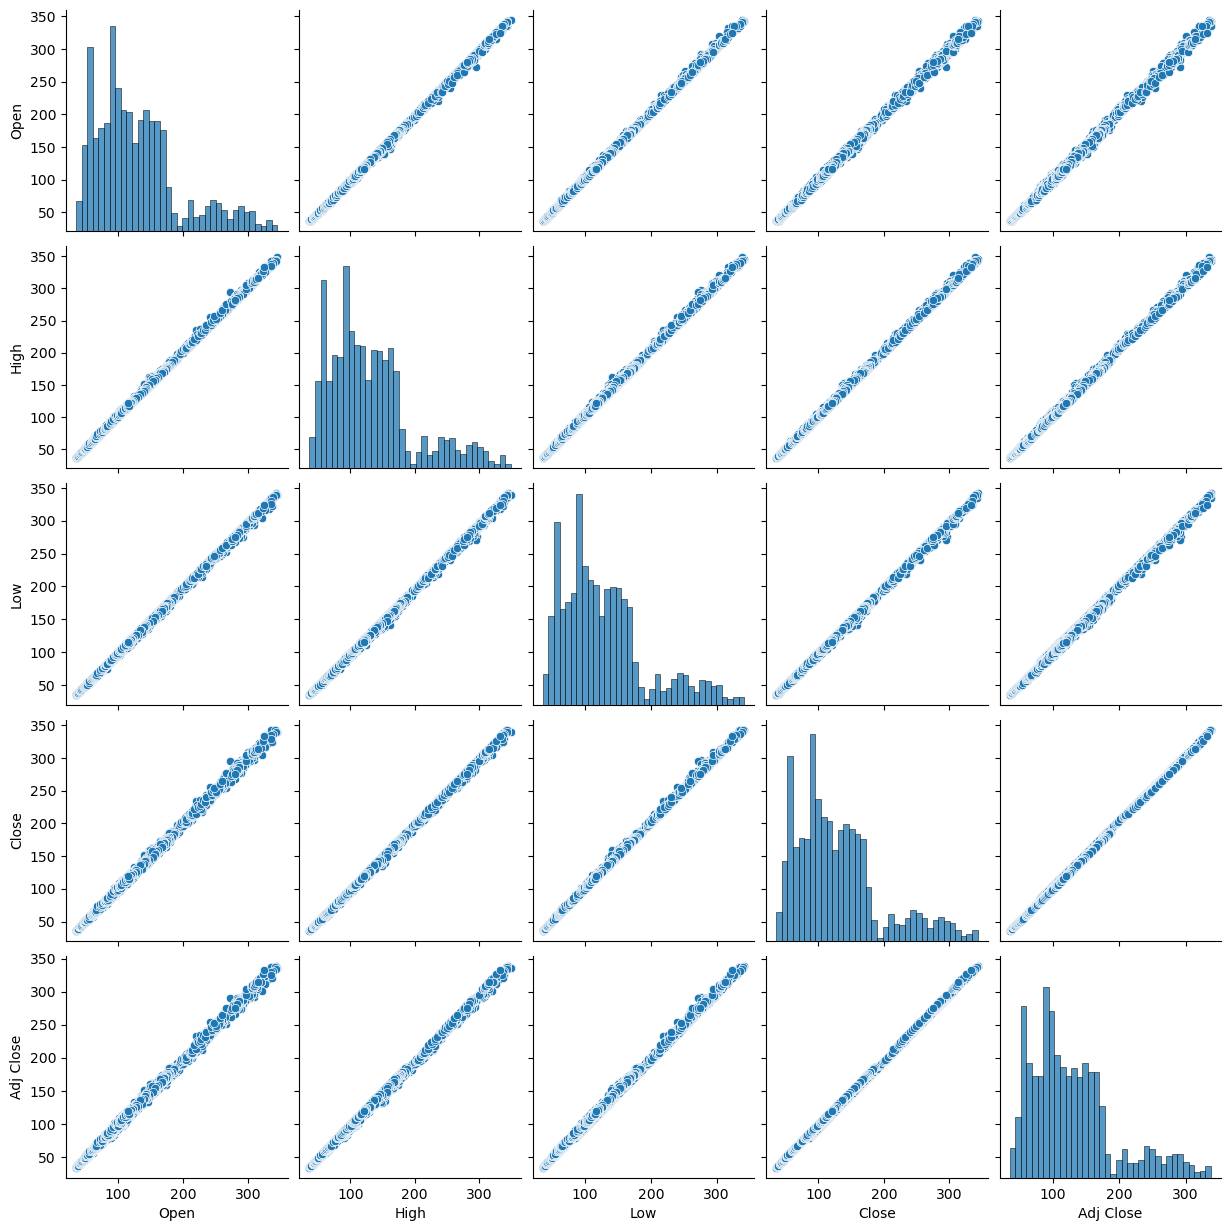

In [18]:
# Repeat pairplot specifically on the prices 

# Select the columns 'Open', 'High', 'Low', 'Close', 'Adj Close'
price = data[['Open', 'High', 'Low', 'Close', 'Adj Close']]

# Create the pairplot
sns.pairplot(price)
plt.show()